In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
results = pd.read_csv('../data/calibration_results_trans.csv').drop(columns='Unnamed: 0')

In [13]:
results.loc[results.true_outcomes == 0].trans_prob_p_int.mean()

0.00020628532703435279

In [73]:
results['p_int_pre_lambda'] = results['trans_prob_p_int'] ** 4
results = pd.read_csv('../data/calibration_results_trans_no_hist.csv').drop(columns='Unnamed: 0')
#results['trans_prob_p_int'] *= 750
display(results)
results.trans_prob_p_int.max()

,gameId,playId,trans_prob_p_int,true_outcomes
0,2018100400,51,0.000048,1
1,2018100400,145,0.000022,1
2,2018100400,169,0.000051,1
3,2018100400,197,0.000023,1
4,2018100400,244,0.000048,1
...,...,...,...,...
831,2018100800,3540,0.000081,1
832,2018100800,3568,0.000028,1
833,2018100800,3757,0.000056,1
834,2018100800,3806,0.000029,1


0.00025629436000000003

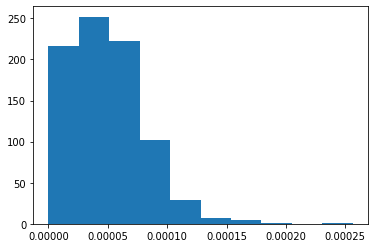

In [74]:
#plt.figure(figsize=(25, 5))
#plt.plot(results['p_int_pre_lambda'])
plt.hist(results['trans_prob_p_int'])
plt.show()

[0.00000000e+00 2.56294360e-05 5.12588720e-05 7.68883080e-05
 1.02517744e-04 1.28147180e-04 1.53776616e-04 1.79406052e-04
 2.05035488e-04 2.30664924e-04]


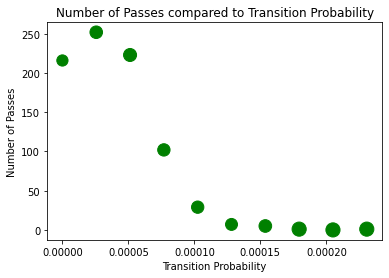

In [75]:
bin_boundaries = np.histogram(results['trans_prob_p_int'])[1][:-1]
results['p_int_bin'] = np.searchsorted(bin_boundaries, results['trans_prob_p_int'], side='right') - 1

#bin_boundaries_pre_lambda = np.histogram(results['p_int_pre_lambda'])[1][:-1]
#results['p_int_pre_lambda_bin'] = np.searchsorted(bin_boundaries_pre_lambda, results['p_int_pre_lambda'], side='right') - 1
#display(results)

results['true_comp_prob'] = results.groupby('p_int_bin').true_outcomes.transform('mean')
#results['true_comp_prob_pre_lambda'] = results.groupby('p_int_pre_lambda_bin').true_outcomes.transform('mean')
true_probs = results.groupby('p_int_bin').true_comp_prob.first().values
true_probs_sizes = results.groupby('p_int_bin').size()
#true_probs_pre_lambda = results.groupby('p_int_pre_lambda_bin').true_comp_prob_pre_lambda.unique().values
#true_probs_pre_lambda_sizes = results.groupby('p_int_pre_lambda_bin').size()

# plot
plt.figure()
plt.title('Number of Passes compared to Transition Probability')
plt.xlabel('Transition Probability')
plt.ylabel('Number of Passes')
true_probs = np.insert(true_probs, 8, 1)
#print(true_probs_sizes.values)
true_probs_sizes = np.insert(true_probs_sizes.values, 8, 0)

print(bin_boundaries)
plt.scatter(bin_boundaries, true_probs_sizes, label='True', s=true_probs * 200, color='g')
#plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), label='Ideal', linestyle='--', color='gray')
#plt.legend()

# plot
#plt.figure()
#plt.title('True Completion Probability over bins of p_int')
#plt.xlabel('P_int (no lambda)')
#plt.ylabel('True Completion Probability')
#plt.scatter(bin_boundaries_pre_lambda + 0.05, true_probs_pre_lambda, label='True', s=true_probs_pre_lambda_sizes, color='g')
#plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), label='Ideal', linestyle='--', color='gray')
#plt.legend()